In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [11]:
fnames=glob.glob('data/sub-*_grasp-bar_forced*')
df_forced_blue=pd.DataFrame()
df_forced_yellow=pd.DataFrame()
for fname in fnames:
    df=pd.read_csv(fname)
    df_blue = df[df['colour'] == 'blue'].groupby(['angle','colour']).mean(numeric_only=True)
    df_forced_blue=pd.concat([df_forced_blue,df_blue])
    df_yellow = df[df['colour'] == 'yellow'].groupby(['angle','colour']).mean(numeric_only=True)
    df_forced_yellow=pd.concat([df_forced_yellow,df_yellow])
    
fnames=glob.glob('data/sub-*_grasp-bar_free*')

df_free_choice=pd.DataFrame()
df_free_rating=pd.DataFrame()
for fname in fnames:
    df=pd.read_csv(fname)
    
    df['yellow']=(df['colour']=='yellow')
    df['blue']=(df['colour']=='blue')
    df_sum = df.groupby(['angle']).mean(numeric_only=True)
    df_free_choice=pd.concat([df_free_choice,df_sum])
    
    df_rating = df.groupby(['angle']).mean(numeric_only=True)
    df_free_rating=pd.concat([df_free_rating,df_rating])


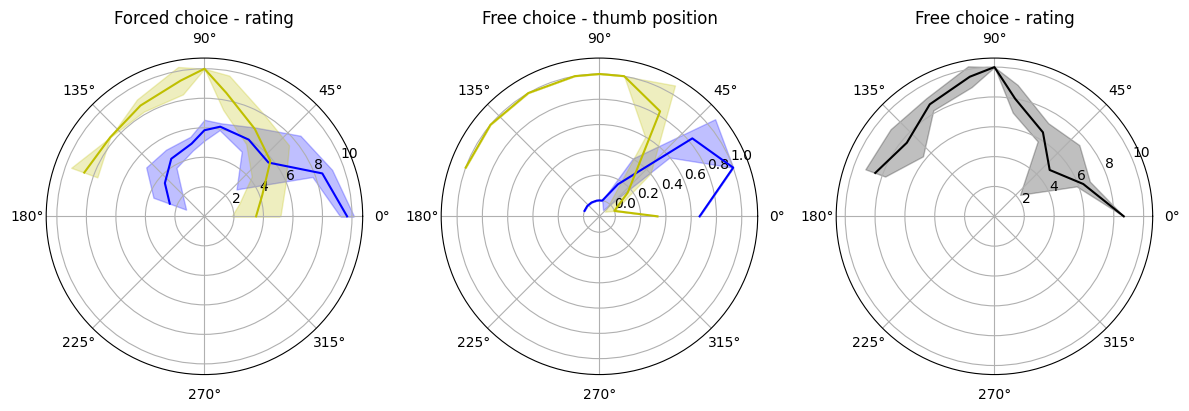

In [18]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3, subplot_kw={'projection': 'polar'})
df_blue_m = df_forced_blue.groupby(['angle','colour']).mean(numeric_only=True)
df_blue_sd = df_forced_blue.groupby(['angle','colour']).std()
angles=np.array([math.radians(x[0]) for x in df_blue_m.index])
ax[0].plot(angles, df_blue_m['rating'],'b')
ax[0].fill_between(angles,(df_blue_m['rating']-df_blue_sd['rating']),(df_blue_m['rating']+df_blue_sd['rating']),color='b',alpha=.25)
df_yellow_m = df_forced_yellow.groupby(['angle','colour']).mean(numeric_only=True)
df_yellow_sd = df_forced_yellow.groupby(['angle','colour']).std()
angles=np.array([math.radians(x[0]) for x in df_yellow_m.index])
ax[0].plot(angles, df_yellow_m['rating'],'y')
ax[0].fill_between(angles,(df_yellow_m['rating']-df_yellow_sd['rating']),(df_yellow_m['rating']+df_yellow_sd['rating']),color='y',alpha=.25)    
ax[0].set_title('Forced choice - rating')

df_free_m = df_free_choice.groupby(['angle']).mean(numeric_only=True)
df_free_sd = df_free_choice.groupby(['angle']).std()
angles=np.array([math.radians(x) for x in df_free_m.index])
ax[1].plot(angles, df_free_m['blue'],'b')
ax[1].fill_between(angles,(df_free_m['blue']-df_free_sd['blue']),(df_free_m['blue']+df_free_sd['blue']),color='b',alpha=.25)
ax[1].plot(angles, df_free_m['yellow'],'y')
ax[1].fill_between(angles,(df_free_m['yellow']-df_free_sd['yellow']),(df_free_m['yellow']+df_free_sd['yellow']),color='y',alpha=.25)
ax[1].set_title('Free choice - thumb position')

df_m = df_free_rating.groupby(['angle']).mean(numeric_only=True)
df_sd = df_free_rating.groupby(['angle']).std()
angles=np.array([math.radians(x) for x in df_m.index])
ax[2].plot(angles, df_m['rating'],'k')
ax[2].fill_between(angles,(df_m['rating']-df_sd['rating']),(df_m['rating']+df_sd['rating']),color='k',alpha=.25)
ax[2].set_title('Free choice - rating')

plt.tight_layout()